<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/Classifier/Classifier_HeartRatePredictionDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from math import log2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [2]:
df = pd.read_csv('/content/Heartattack_prediction_data.csv')

In [3]:
df.head(5)

Sex  Age  Heart Rate  Glucose    BMI  Smoker  Ciggarates(Per Day)  \
0    1   39        80.0     77.0  26.97       0                  0.0   
1    0   46        95.0     76.0  28.73       0                  0.0   
2    1   48        75.0     70.0  25.34       1                 20.0   
3    0   61        65.0    103.0  28.58       1                 30.0   
4    0   46        85.0     85.0  23.10       1                 23.0   

   Hypertension  Systolic  BP  Diastolic BP  ON BP Medication  \
0             0         106.0          70.0               0.0   
1             0         121.0          81.0               0.0   
2             0         127.5          80.0               0.0   
3             1         150.0          95.0               0.0   
4             0         130.0          84.0               0.0   

   Previous Stroke  Diabetic  RiskOfCHD  
0                0         0          0  
1                0         0          0  
2                0         0          0  
3                0         0          1  
4                0         0          0

In [4]:
df.shape

(4312, 14)

In [5]:
df.isnull().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [6]:
df.isna().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [7]:
df.dropna(inplace=True)

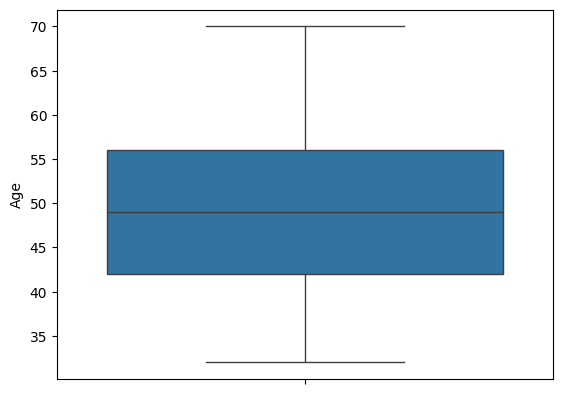

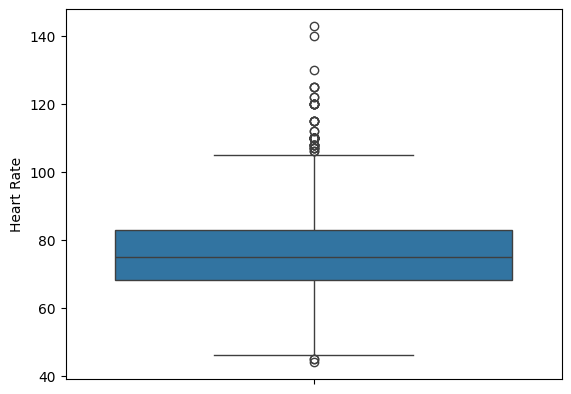

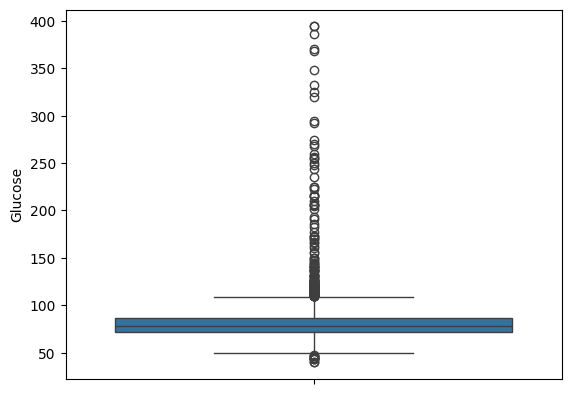

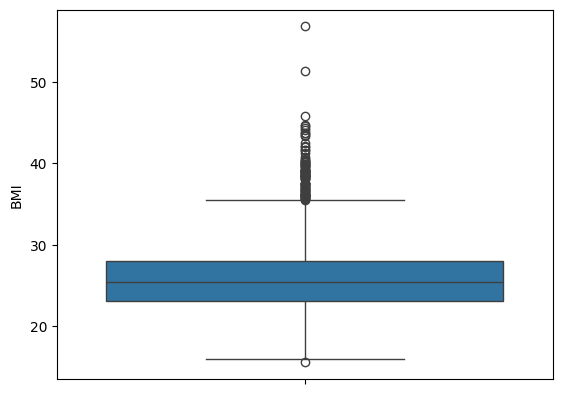

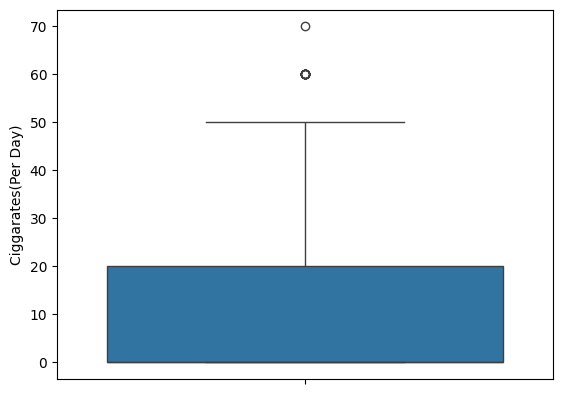

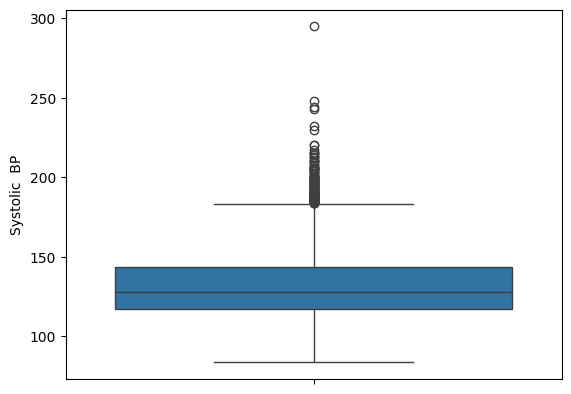

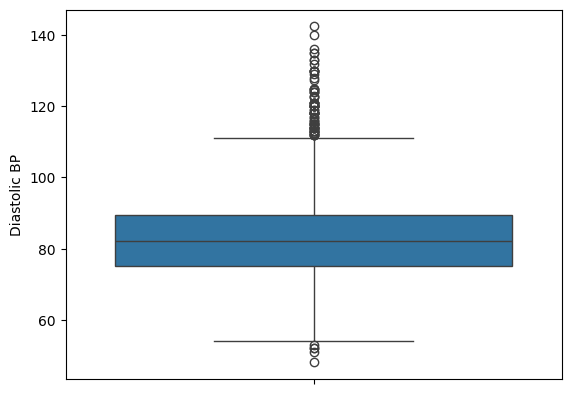

In [8]:
cols = df.columns
for col in cols:
  if(df[col].value_counts().size>2):
    sns.boxplot(df[col])
    plt.show()

Remove outliers from Heart Rate, Glucose , BMI BP readings

In [9]:
def remove_outliers(data_frame, series_col):
 Q1 = np.percentile(series_col, 25)
 Q3 = np.percentile(series_col, 75)
 IQR = Q3 - Q1
 Lower_Limit = Q1 - 1.5 * IQR
 Upper_Limit = Q3 + 1.5 * IQR
 Upper_Limit = Q3 + 1.5 * IQR
 data_frame = data_frame[(series_col >Lower_Limit) & (series_col < Upper_Limit)]
 return data_frame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4017 non-null   int64  
 1   Age                  4017 non-null   int64  
 2   Heart Rate           4017 non-null   float64
 3   Glucose              4017 non-null   float64
 4   BMI                  4017 non-null   float64
 5   Smoker               4017 non-null   int64  
 6   Ciggarates(Per Day)  4017 non-null   float64
 7   Hypertension         4017 non-null   int64  
 8   Systolic  BP         4017 non-null   float64
 9   Diastolic BP         4017 non-null   float64
 10  ON BP Medication     4017 non-null   float64
 11  Previous Stroke      4017 non-null   int64  
 12  Diabetic             4017 non-null   int64  
 13  RiskOfCHD            4017 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 470.7 KB


In [34]:
df[['RiskOfCHD']].value_counts()

RiskOfCHD
0            3067
1             467
Name: count, dtype: int64

In [11]:
df=remove_outliers(df,df['Heart Rate'])
df=remove_outliers(df,df['BMI'])
df=remove_outliers(df,df['Glucose'])

df=remove_outliers(df,df['Diastolic BP'])
df=remove_outliers(df,df['Systolic  BP'])

<Axes: >

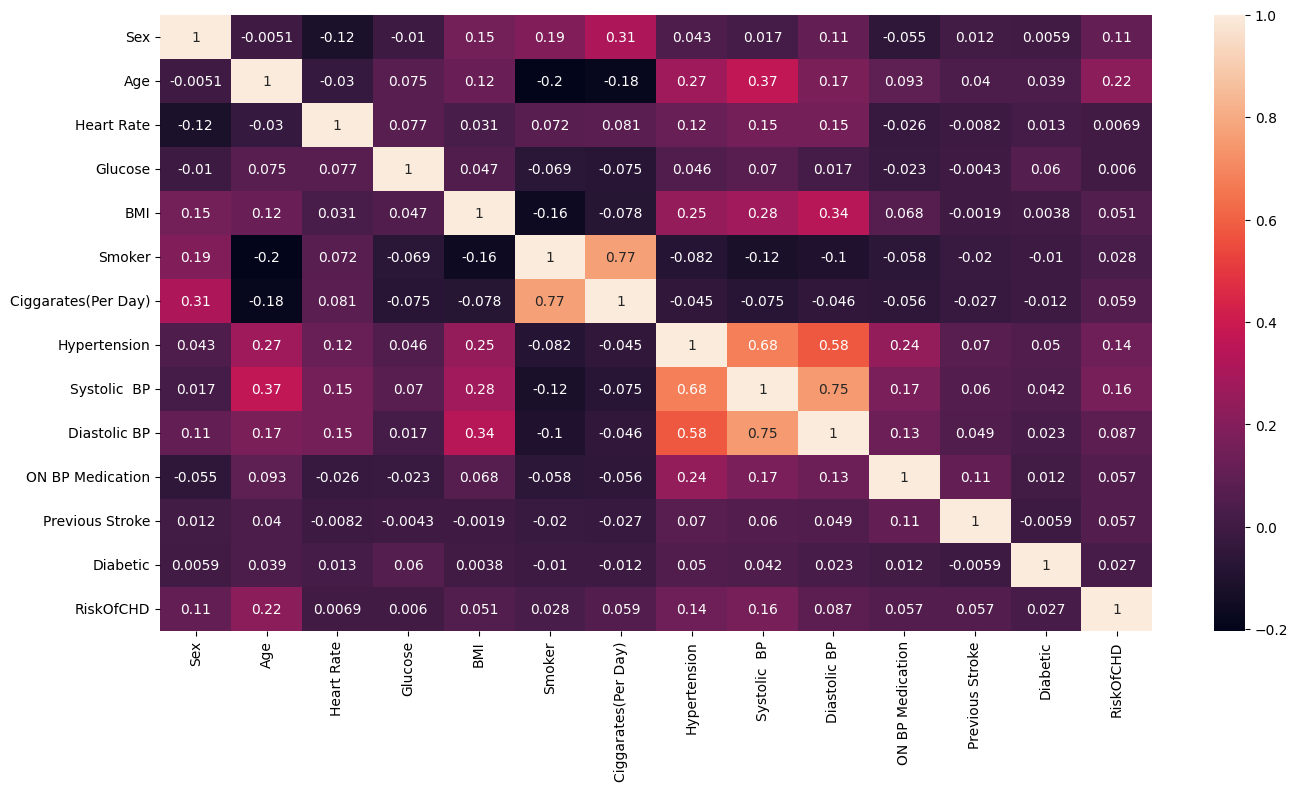

In [12]:
corr = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True)

RiskOfCHD has good correlation with Age 0.22, Systolic BP 0.16 , Hypertension 0.14 and Sex 0.11 (in descending order) </br>
Systolic BP and Hypertension has correlation 0.68 </br>
Age has correlation of 0.37 with Systolic BP </br>
Age has correlation of 0.27 with Hypertension </br>
## Confused which columns to consider ???

Since we have to classify whether An individual with given parameter readings has Risk of CHD or not, we will use Classifier algortihm.

In [27]:
y=df[['RiskOfCHD']]
#X=df[['Age','Systolic  BP']]
X=df[['Age','Systolic  BP','Hypertension','Sex','Diastolic BP']]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
model =DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [30]:
dot_data = export_graphviz(model , feature_names=X_train.columns, rounded=True, proportion=False, precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [31]:
y_test_pred=model.predict(X_test)

In [32]:
cm = confusion_matrix(y_test, y_test_pred)


Text(58.222222222222214, 0.5, 'Truth')

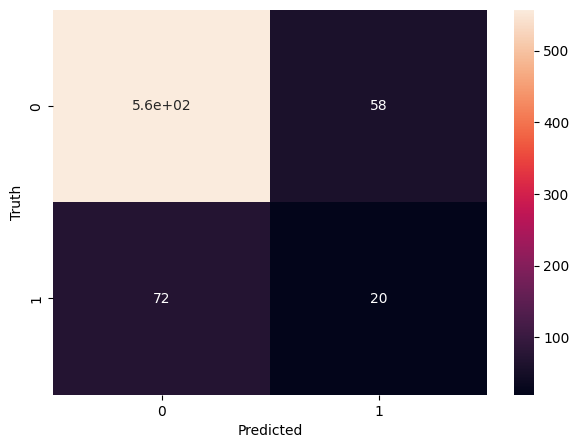

In [33]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Have tried with more feature variables but the error remains same , does not decrease, When looked at the data, found the data is not balanced, there are 3067 records with NO RiskOfCHD and 467 records with RiskOfCHD.